In [101]:
import pandas as pd

In [2]:
listings = pd.read_csv('listings.csv')
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [3]:
rev = pd.read_csv('reviews.csv')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [102]:
rev.iloc[0][5]

"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)"

In [103]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


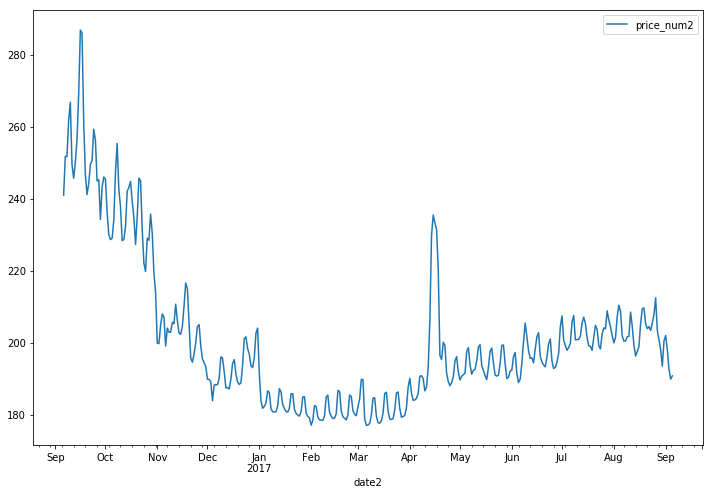

In [153]:
pd.DataFrame(calendar[calendar.price.notnull()].groupby('date2').price_num2.mean()).reset_index().plot('date2', 'price_num2', kind = 'line', figsize = (12, 8));

In [167]:
listings.groupby('neighbourhood').

In [176]:
import seaborn as sns

In [178]:
base_color = sns.color_palette()[0]

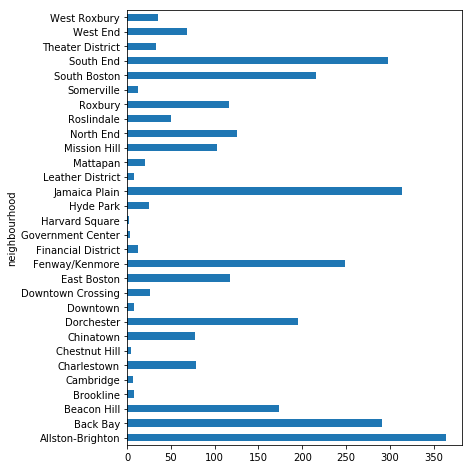

In [180]:
listings.groupby('neighbourhood').id.size().plot(kind = 'barh', color = base_color, figsize = (6, 8));

In [215]:
import matplotlib.pyplot as plt

In [219]:
calendar = pd.merge(left = calendar, right = listings[['id', 'neighbourhood']], right_on = 'id', left_on = 'listing_id', how = 'left')

In [222]:
calendar.drop(['date', 'price', 'price_num', 'price2'], axis = 1, inplace = True)

In [225]:
calendar = calendar.rename(columns= {'date2':'date',
                         'price_num2':'price'})

In [227]:
calendar.available = np.where(calendar.available == 't', True, False)

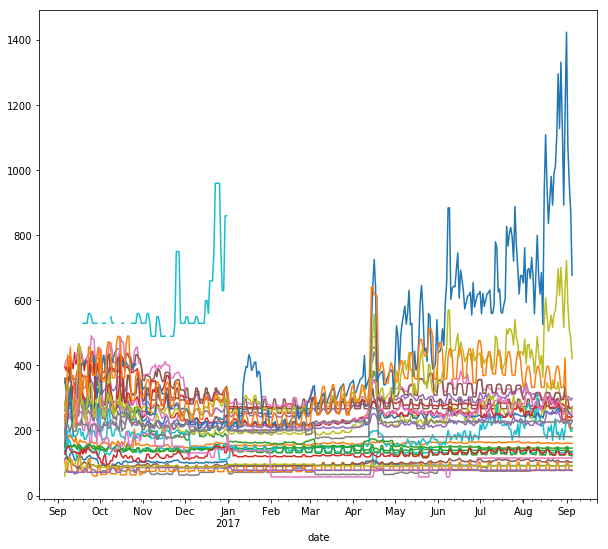

In [217]:
for place in listings.neighbourhood.unique().tolist():
    try:
        jamaica_list = listings[listings.neighbourhood == place].id.tolist()
        calendar[calendar.listing_id.isin(jamaica_list)].groupby('date').price_num2.mean().plot(kind = 'line', figsize = (10, 9));
    except: AttributeError
        
#plt.legend();

In [197]:
calendar.shape

(1308890, 9)

In [208]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [198]:
3585 * 365

1308525

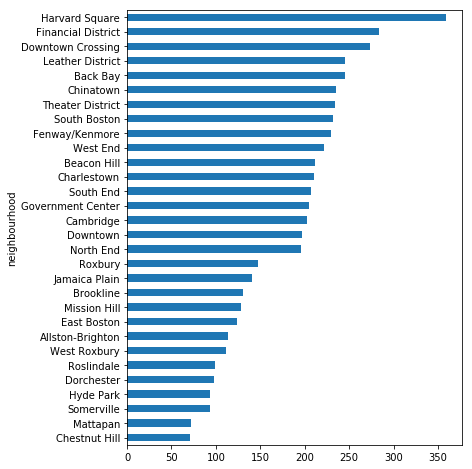

In [196]:
listings.groupby('neighbourhood').price.mean().sort_values().plot(kind = 'barh', color = base_color, figsize = (6, 8));

In [194]:
listings['price'] = listings.price.str.replace(',', '').str[1:].astype('float')

In [ ]:
listings.groupby(['neighbourhood', '']).id.size()

In [182]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [185]:
listings[['calendar_last_scraped', 'last_scraped']].head()

,calendar_last_scraped,last_scraped
0,2016-09-06,2016-09-07
1,2016-09-06,2016-09-07
2,2016-09-06,2016-09-07
3,2016-09-06,2016-09-07
4,2016-09-06,2016-09-07


In [186]:
listings.shape

(3585, 95)

In [149]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 7 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
price_num     643037 non-null object
price2        643037 non-null object
price_num2    643037 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 69.9+ MB


In [150]:
calendar['date2'] = pd.to_datetime(calendar['date'])

In [156]:
calendar['dayname'] = calendar.date2.dt.day_name()

In [162]:
calendar.groupby('dayname').price_num2.mean()

dayname
Friday       203.121167
Monday       195.809561
Saturday     203.408387
Sunday       198.219764
Thursday     198.073112
Tuesday      195.173842
Wednesday    195.418228
Name: price_num2, dtype: float64

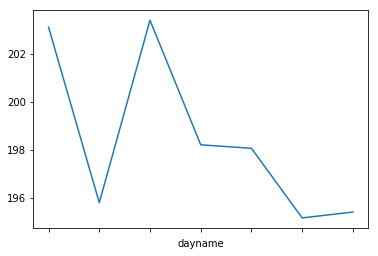

In [158]:
calendar.groupby('dayname').price_num2.mean().plot(kind = 'line');

In [152]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 8 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
price_num     643037 non-null object
price2        643037 non-null object
price_num2    643037 non-null float64
date2         1308890 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 79.9+ MB


In [119]:
import numpy as np

In [129]:
calendar['price2'] = calendar.price.str.replace(',', '')

In [131]:
calendar['price_num'] = calendar.price2.str[1:]

In [132]:
calendar['price_num2'] = pd.to_numeric(calendar['price_num'], errors = 'raise')

In [133]:
calendar

,listing_id,date,available,price,price_num,price2,price_num2
0,12147973,2017-09-05,f,NaN,NaN,NaN,NaN
1,12147973,2017-09-04,f,NaN,NaN,NaN,NaN
2,12147973,2017-09-03,f,NaN,NaN,NaN,NaN
3,12147973,2017-09-02,f,NaN,NaN,NaN,NaN
4,12147973,2017-09-01,f,NaN,NaN,NaN,NaN
5,12147973,2017-08-31,f,NaN,NaN,NaN,NaN
6,12147973,2017-08-30,f,NaN,NaN,NaN,NaN
7,12147973,2017-08-29,f,NaN,NaN,NaN,NaN
8,12147973,2017-08-28,f,NaN,NaN,NaN,NaN
9,12147973,2017-08-27,f,NaN,NaN,NaN,NaN


In [108]:
calendar.date.max()

'2017-09-05'

In [106]:
listings[listings.id == 12147973]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


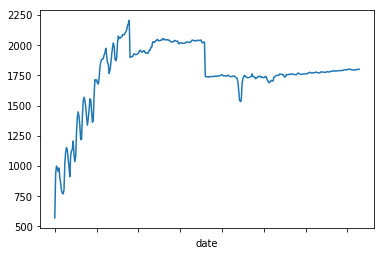

In [89]:
calendar[calendar.available == 't'].groupby('date').listing_id.count().plot(kind = 'line')

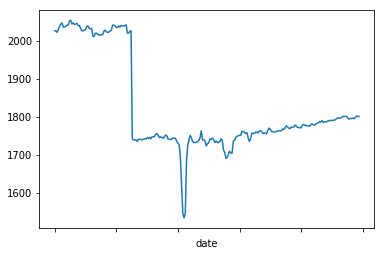

In [94]:
calendar[(calendar.date.str.startswith('2017')) & (calendar.available == 't')].groupby('date').listing_id.count().plot(kind = 'line');

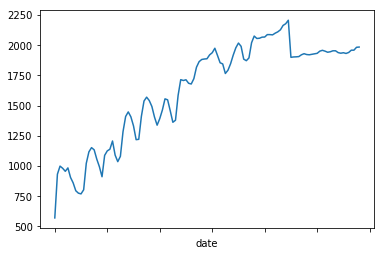

In [96]:
calendar[(calendar.date.str.startswith('2016')) & (calendar.available == 't')].groupby('date').listing_id.count().plot(kind = 'line');

In [100]:
calendar.date.max()

'2017-09-05'

In [6]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [7]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [8]:
listings.shape

(3585, 95)

In [76]:
listings.reviews_per_month.head()

0     NaN
1    1.30
2    0.47
3    1.00
4    2.25
Name: reviews_per_month, dtype: float64

Inspiration

Can you describe the vibe of each Boston neighborhood using listing descriptions?

What are the busiest times of the year to visit Boston? By how much do prices spike?

Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?

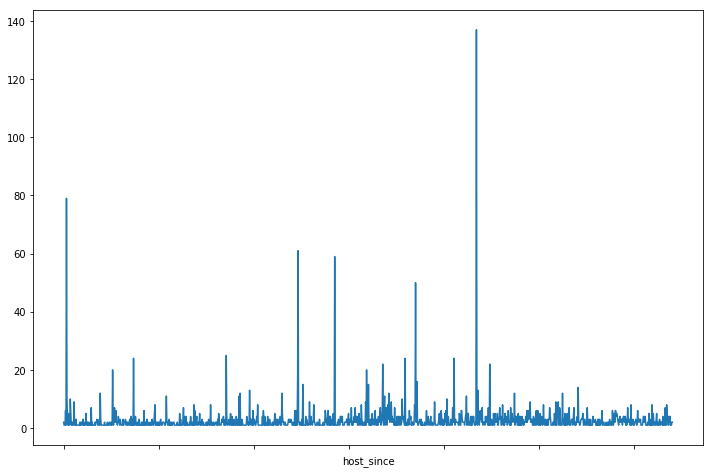

In [83]:
listings.groupby('host_since').id.count().plot(kind = 'line', figsize = (12, 8));

In [77]:
listings.iloc[0]

id                                                                           12147973
listing_url                                     https://www.airbnb.com/rooms/12147973
scrape_id                                                              20160906204935
last_scraped                                                               2016-09-07
name                                                       Sunny Bungalow in the City
summary                             Cozy, sunny, family home.  Master bedroom high...
space                               The house has an open and cozy feel at the sam...
description                         Cozy, sunny, family home.  Master bedroom high...
experiences_offered                                                              none
neighborhood_overview               Roslindale is quiet, convenient and friendly. ...
notes                                                                             NaN
transit                             The bus stop is 2 